In [1]:
from neuron import *
from encodingsource import *
from hsgs import *
from classical_neuron import *
from classical_pso import *
from sf import *
simulator = Aer.get_backend('qasm_simulator')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.10) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


PARA N 2
[0, 0, 0, 0] [0, 0, 0, 0] [0, 0, 0, 0]


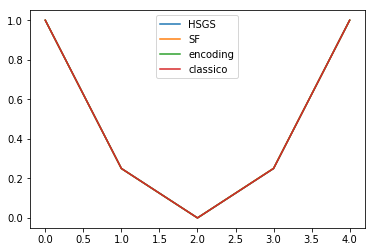

PARA N 3
[0, 0, 0, 0] [0, 0, 0, 0] [0, 0, 0, 0]


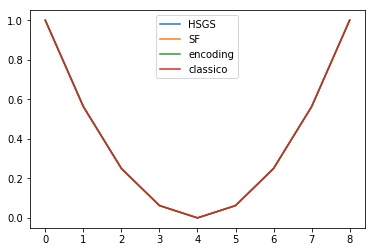

In [45]:
def createManyListOfList(n):
    returnList = []
    for i in range(n):
        returnList.append([])
    return returnList

import numpy as np



qtdeEntradas = (2**2)
qtdeExperimentoDiferencas = 2**n
repeticoes = 30
precisao = 3

for n in [2,3]:
    print("PARA N", n)
    qtdeEntradas = 50
    qtdeExperimentoDiferencas = 2**n
    valoresHSGS=createManyListOfList(qtdeExperimentoDiferencas+1)
    valoresSF=createManyListOfList(qtdeExperimentoDiferencas+1)
    valoresEncoding=createManyListOfList(qtdeExperimentoDiferencas+1)
    valoresClassico=createManyListOfList(qtdeExperimentoDiferencas+1)
    for i in range(qtdeEntradas):

        inputVector = generateRandomState(2**n)

        for diferencaEntradaPeso in range(qtdeExperimentoDiferencas+1):
            weightVector = generateWeightWithSomeDifference(inputVector, diferencaEntradaPeso)



            #inputVector = inputVector + len(inputVector)*[1]
            #weightVector = weightVector + len(weightVector)*[1]
            operator = "hsgs"
            neuron = createNeuron(inputVector, weightVector, operator)
            resultadoHSGS = executeNeuron(neuron, simulator, threshold=None)
            operator = "sf"
            neuron = createNeuron(inputVector, weightVector, operator)
            resultadoSF =executeNeuron(neuron, simulator, threshold=None)
            operator = "encoding-input"
            neuron = createNeuron(inputVector, weightVector, operator)
            resultadoEncoding = executeNeuron(neuron, simulator, threshold=None)
            resultadoClassico = runClassicalNeuronReturnProbability(inputVector, weightVector)

            #erroHSGS = abs(resultadoHSGS-resultadoClassico)
            #erroSF = abs(resultadoSF-resultadoClassico)
            #erroEncoding = abs(resultadoEncoding-resultadoClassico)

            #erroMedioHSGS += round(erroHSGS,precisao)/(repeticoes*qtdeEntradas)
            #erroMedioSF += round(erroSF,precisao)/(repeticoes*qtdeEntradas)
            #erroEncoding += round(erroEncoding,precisao)/(repeticoes*qtdeEntradas)
            #print(resultadoHSGS, resultadoEncoding, resultadoClassico)
            valoresHSGS[diferencaEntradaPeso].append(resultadoHSGS)
            valoresSF[diferencaEntradaPeso].append(resultadoSF)
            valoresEncoding[diferencaEntradaPeso].append(resultadoEncoding)
            valoresClassico[diferencaEntradaPeso].append(resultadoClassico)






    print(errosMedioHSGS,errosMedioSF,errosMedioEncoding )
    plt.plot( range(qtdeExperimentoDiferencas+1), [np.average(i) for i in valoresHSGS], label="HSGS" )
    plt.plot( range(qtdeExperimentoDiferencas+1), [np.average(i) for i in valoresSF], label="SF")
    plt.plot( range(qtdeExperimentoDiferencas+1), [np.average(i) for i in valoresEncoding],label="encoding")
    plt.plot( range(qtdeExperimentoDiferencas+1), [np.average(i) for i in valoresClassico],label="classico")
    plt.legend()
    
    plt.show()

PARA N 2 COM BIAS
[0, 0, 0, 0] [0, 0, 0, 0] [0, 0, 0, 0]


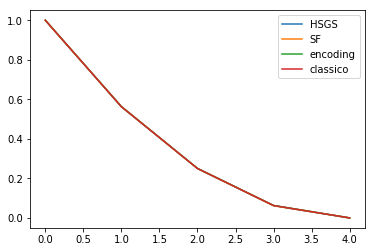

PARA N 3 COM BIAS
[0, 0, 0, 0] [0, 0, 0, 0] [0, 0, 0, 0]


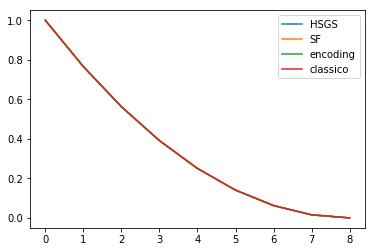

In [51]:
def createManyListOfList(n):
    returnList = []
    for i in range(n):
        returnList.append([])
    return returnList

import numpy as np



qtdeEntradas = (2**2)
qtdeExperimentoDiferencas = 2**n
repeticoes = 30
precisao = 3

for n in [2,3]:
    print("PARA N", n, "COM BIAS")
    qtdeEntradas = 50
    qtdeExperimentoDiferencas = 2**n
    valoresHSGS=createManyListOfList(qtdeExperimentoDiferencas+1)
    valoresSF=createManyListOfList(qtdeExperimentoDiferencas+1)
    valoresEncoding=createManyListOfList(qtdeExperimentoDiferencas+1)
    valoresClassico=createManyListOfList(qtdeExperimentoDiferencas+1)
    for i in range(qtdeEntradas):
        inputVector = generateRandomState(2**n)

        for diferencaEntradaPeso in range(qtdeExperimentoDiferencas+1):
            
            weightVector = generateWeightWithSomeDifference(inputVector, diferencaEntradaPeso)
            


            inputVectorNew = inputVector + len(inputVector)*[1]
            weightVectorNew = weightVector + len(weightVector)*[1]
            
            operator = "hsgs"
            neuron = createNeuron(inputVectorNew, weightVectorNew, operator)
            resultadoHSGS = executeNeuron(neuron, simulator, threshold=None)
            operator = "sf"
            neuron = createNeuron(inputVectorNew, weightVectorNew, operator)
            resultadoSF =executeNeuron(neuron, simulator, threshold=None)
            operator = "encoding-input"
            neuron = createNeuron(inputVectorNew, weightVectorNew, operator)
            resultadoEncoding = executeNeuron(neuron, simulator, threshold=None)
            resultadoClassico = runClassicalNeuronReturnProbability(inputVectorNew, weightVectorNew)

            #erroHSGS = abs(resultadoHSGS-resultadoClassico)
            #erroSF = abs(resultadoSF-resultadoClassico)
            #erroEncoding = abs(resultadoEncoding-resultadoClassico)

            #erroMedioHSGS += round(erroHSGS,precisao)/(repeticoes*qtdeEntradas)
            #erroMedioSF += round(erroSF,precisao)/(repeticoes*qtdeEntradas)
            #erroEncoding += round(erroEncoding,precisao)/(repeticoes*qtdeEntradas)
            #print(resultadoHSGS, resultadoEncoding, resultadoClassico)
            valoresHSGS[diferencaEntradaPeso].append(resultadoHSGS)
            valoresSF[diferencaEntradaPeso].append(resultadoSF)
            valoresEncoding[diferencaEntradaPeso].append(resultadoEncoding)
            valoresClassico[diferencaEntradaPeso].append(resultadoClassico)






    print(errosMedioHSGS,errosMedioSF,errosMedioEncoding )
    plt.plot( range(qtdeExperimentoDiferencas+1), [np.average(i) for i in valoresHSGS], label="HSGS" )
    plt.plot( range(qtdeExperimentoDiferencas+1), [np.average(i) for i in valoresSF], label="SF")
    plt.plot( range(qtdeExperimentoDiferencas+1), [np.average(i) for i in valoresEncoding],label="encoding")
    plt.plot( range(qtdeExperimentoDiferencas+1), [np.average(i) for i in valoresClassico],label="classico")
    plt.legend()
    
    plt.show()